<a href="https://colab.research.google.com/github/URK23CS1219/Experiment/blob/main/Data_Preprocessing_ML_Bootcamp_MnM_Society.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>Data Perprocessing</h1>

Data preprocessing involves cleaning, transforming, and preparing raw data for analysis by handling missing values, scaling, encoding,

Missing data is always a problem in real life scenarios. Areas like machine learning and data mining face severe issues in the accuracy of their model predictions because of poor quality of data caused by missing values. In these areas, missing value treatment is a major point of focus to make their models more accurate and valid.

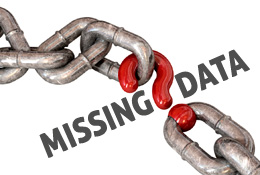

**When and Why Is Data Missed?**

Let us consider an online survey for a product. Many a times, people do not share all the information related to them. Few people share their experience, but not how long they are using the product; few people share how long they are using the product, their experience but not their contact information. Thus, in some or the other way a part of data is always missing, and this is very common in real time.

In [1]:
#How to identify missing values ?
import numpy as np
import pandas as pd
data={'Day':["Day 1",np.nan,"Day 3","Day 4","Day 5","Day 6","Day 7","Day 8","Day 9","Day 10","Day 10"],'Temp':[34,33,np.nan,35,np.nan,np.nan,np.nan,38,37,39,39]}
df=pd.DataFrame(data)
df

,Day,Temp
0,Day 1,34.0
1,NaN,33.0
2,Day 3,NaN
3,Day 4,35.0
4,Day 5,NaN
5,Day 6,NaN
6,Day 7,NaN
7,Day 8,38.0
8,Day 9,37.0
9,Day 10,39.0


##<b><h3>Finding Null Values</h3> </b>
<b>.isnull() or .isna()</b> is a pandas function Which Will return Boolean Values, If the value is null then will return False else True for the Selected Column

<b>Syntax: </b>df['column name'].isnull() or df['column name'].isna()


In [2]:
df['Temp'].isnull()
# df['Temp'].isna()

0     False
1     False
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10    False
Name: Temp, dtype: bool

<b>.notnull</b> is a pandas function Which will return Boolean Values, If the value is null then will return True else False for the Selected Column

<b>Syntax: </b>df['column name'].notnull()

In [3]:
df['Temp'].notnull()

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7      True
8      True
9      True
10     True
Name: Temp, dtype: bool

###<b>Counting Missing Values</b>

In [4]:
df['Temp'].isnull().sum() #for the column name Temp

4

In [5]:
df.isnull().sum() # for entire data frame

Day     1
Temp    4
dtype: int64

###**How to handle missing values in a dataset after identifying ?**

>Replace Missing Values

>Fill missing values

>Drop missing values

In [9]:
df["Temp"].replace(np.NaN,100) #replace null values by any another value

0      34.0
1      33.0
2     100.0
3      35.0
4     100.0
5     100.0
6     100.0
7      38.0
8      37.0
9      39.0
10     39.0
Name: Temp, dtype: float64

In [10]:
df

,Day,Temp
0,Day 1,34.0
1,NaN,33.0
2,Day 3,NaN
3,Day 4,35.0
4,Day 5,NaN
5,Day 6,NaN
6,Day 7,NaN
7,Day 8,38.0
8,Day 9,37.0
9,Day 10,39.0


In [11]:
df1=df["Temp"].replace(np.NaN,100) #the null values will be replaced and saved in new data Frame df1
df1

0      34.0
1      33.0
2     100.0
3      35.0
4     100.0
5     100.0
6     100.0
7      38.0
8      37.0
9      39.0
10     39.0
Name: Temp, dtype: float64

In [12]:
df2=df.copy()
df2["Temp"].replace(np.nan,100,inplace=True)#the null values will be replaced and saved in the same data Frame df2
df2

,Day,Temp
0,Day 1,34.0
1,NaN,33.0
2,Day 3,100.0
3,Day 4,35.0
4,Day 5,100.0
5,Day 6,100.0
6,Day 7,100.0
7,Day 8,38.0
8,Day 9,37.0
9,Day 10,39.0


###**Fill Missing Values**

Different methods to fill the missing values
>Mean,Median, Mode

>bfill,ffill

>interpolate


**Mean,Median, Mode**

Numerical Data →Mean/Median

Categorical Data →Mode

In [14]:
dfm=df.copy()
dfm['Temp'].fillna(dfm['Temp'].mean(),inplace=True) #replace null values with the mean value of that column
dfm

,Day,Temp
0,Day 1,34.000000
1,NaN,33.000000
2,Day 3,36.428571
3,Day 4,35.000000
4,Day 5,36.428571
5,Day 6,36.428571
6,Day 7,36.428571
7,Day 8,38.000000
8,Day 9,37.000000
9,Day 10,39.000000


<b><h3> Try it for Median, Mode</h3>

**bfill:**
backward fill — It will propagate the first observed non-null value backward.


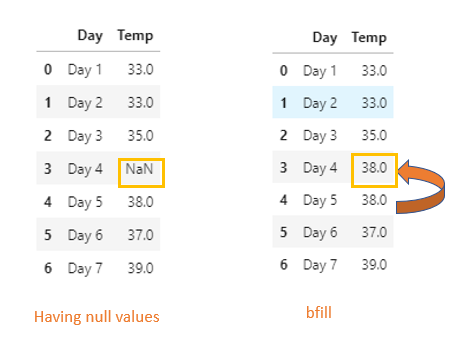


**ffill:**
forward fill — it propagates the last observed non-null value forward.


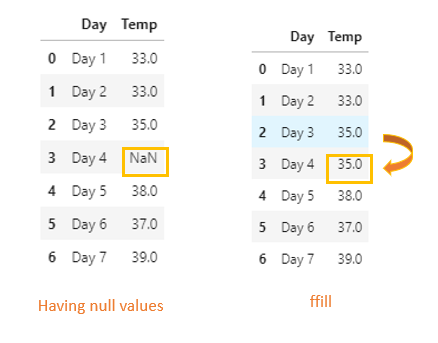

In [17]:
dfb=df.copy()
dfb['Temp'].bfill(inplace=True)
dfb

,Day,Temp
0,Day 1,34.0
1,NaN,33.0
2,Day 3,35.0
3,Day 4,35.0
4,Day 5,38.0
5,Day 6,38.0
6,Day 7,38.0
7,Day 8,38.0
8,Day 9,37.0
9,Day 10,39.0


<b><h3> Try for bfill</h3>

**interpolate**

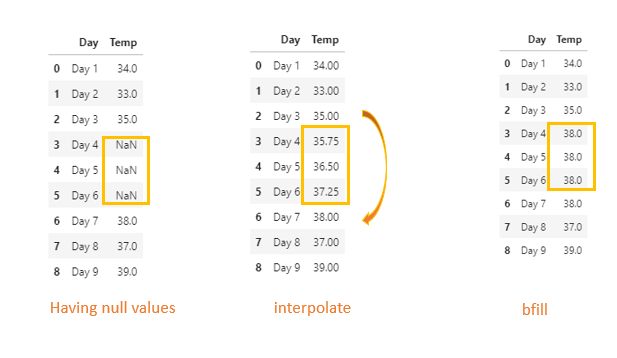


**NOTE:**bfill/ffill will fill the same value for consequent missing values.
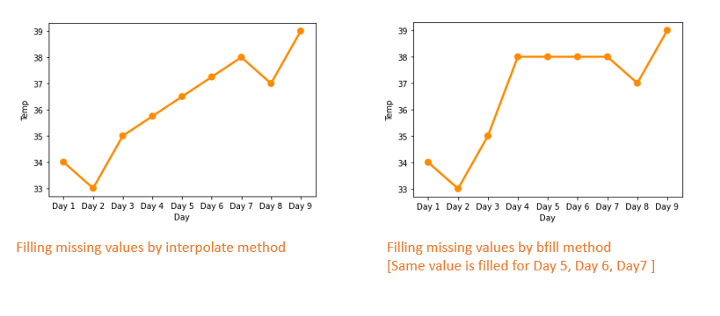

<b>Estimated value = (difference between known values/Number of Intervals x number of intervals from the first known value) +known value

For the missing value at position 2:<br>
<ol>((38 - 35) / (7 - 3)) * (4 - 3) + 35 = ((3) / (4)) * 1 + 35 = 0.75 + 35 = 35.75</ol>
For the missing value at position 3:
<ol>((38 - 35) / (7 - 3)) * (5 - 3) + 35 = ((3) / (4)) * 2 + 35 = 1.5 + 35 = 36.5</ol>
For the missing value at position 4:
<ol>((38 - 35) / (7 - 3)) * (6 - 3) + 35 = ((3) / (4)) * 3 + 35 = 2.25 + 35 = 37.25</ol>

In [ ]:
dfi=df.copy()
dfi['Temp']=df['Temp'].interpolate()
dfi

,Day,Temp
0,Day 1,34.00
1,NaN,33.00
2,Day 3,34.00
3,Day 4,35.00
4,Day 5,35.75
5,Day 6,36.50
6,Day 7,37.25
7,Day 8,38.00
8,Day 9,37.00
9,Day 10,39.00


###**Drop Missing Values**



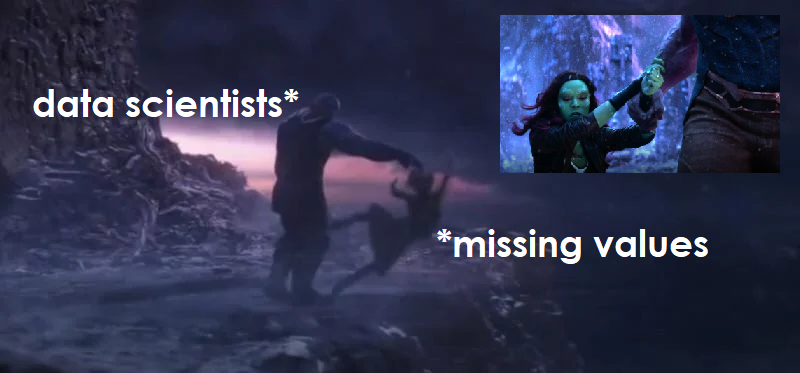

In [ ]:
dfd=df.copy()
dfd.dropna(subset=["Temp"])  #To drop all The rows with null values in a Column(Temp)
#dfd.dropna() #To drop all The rows with null values in the entire Data Frame
#dfd['Temp'].drop_duplicates()  #To drop all the duplicate values in a Column (Temp)
#dfd.drop_duplicates() #To drop all the duplicate values in the entire Data Frame

,Day,Temp
0,Day 1,34.0
1,NaN,33.0
3,Day 4,35.0
7,Day 8,38.0
8,Day 9,37.0
9,Day 10,39.0
10,Day 10,39.0


In [ ]:
dfc=df.copy()
dfc.drop(columns="Day",axis=1,inplace=True)
dfc

,Temp
0,34.0
1,33.0
2,NaN
3,35.0
4,NaN
5,NaN
6,NaN
7,38.0
8,37.0
9,39.0


##**<h3>Removing Outliers</h3>**

<b>What is Outliers ? </b><br>
Outliers are data points that significantly deviate from the rest of the dataset, potentially skewing statistical analysis and machine learning models.

<b>How did these outliers were occur ?</b><br>
Outliers can be formed due to various reasons such as measurement errors, data entry mistakes, natural variability, extreme events, or rare occurrences in the data-generating process.

<b>Why Should we remove Outliers? <br></b>
Because, removing outliers improves model accuracy, preserves assumptions, enhances interpretability, reduces variability, and avoids undue influence, leading to more reliable analysis and decision-making.

<b>How to remove Outliers ?</b>

In [ ]:
df=pd.read_csv("/iris_EDA - iris_EDA.csv")
df['Score'].fillna(df['Score'].mean(),inplace=True)
df

,sepallength,sepalwidth,petallength,petalwidth,class,Name,Score,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,F1,12.0,Red
1,4.9,3.0,1.4,0.2,Iris-setosa,F2,36.0,Blue
2,4.7,3.2,1.3,NaN,Iris-setosa,F3,18.0,Orange
3,4.6,3.1,1.5,0.2,Iris-setosa,F4,14.0,Purple
4,5.0,3.6,1.4,0.2,Iris-setosa,F5,22.0,Red
5,5.4,3.9,1.7,0.4,Iris-setosa,F6,27.0,Blue
6,4.6,3.4,1.4,NaN,Iris-setosa,F7,24.0,Orange
7,5.0,3.4,1.5,0.2,Iris-setosa,F8,23.0,Purple
8,7.0,3.2,4.7,1.4,Iris-versicolor,F9,16.0,Red
9,6.4,3.2,4.5,1.5,Iris-versicolor,F10,19.0,Blue


<b>IQR (Interquartile Range)</b><br>
The Interquartile Range (IQR) is a measure of statistical dispersion that indicates the spread of a dataset's middle 50% of values. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1), providing a robust measure of variability that is less influenced by outliers compared to the range.


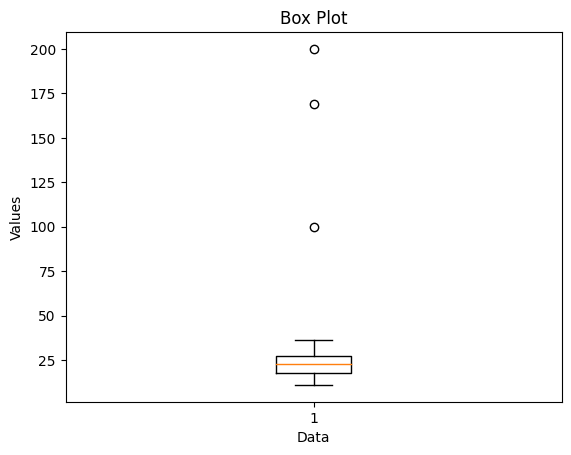

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df["Score"])
plt.title('Box Plot')
plt.xlabel('Data')
plt.ylabel('Values')
plt.show()

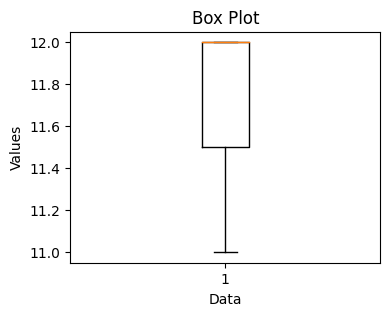

In [ ]:
q1=df["Score"].quantile(0.25)
q3=df["Score"].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3-1.5*IQR
df_without_outliers=df[(df["Score"]>=lower_bound) & (df["Score"]<=upper_bound)]

plt.figure(figsize=(4,3))
plt.boxplot(df_without_outliers["Score"])
plt.title('Box Plot')
plt.xlabel('Data')
plt.ylabel('Values')
plt.show()